In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MaxAbsScaler
from sklearn import model_selection, datasets, svm
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [40]:
import data_process_funcs as dpf

In [41]:
def features_to_int(df):
    df_ = df
    label_encoder = LabelEncoder()
    df_['backend'] = label_encoder.fit_transform(df_['backend'])
    df_['circuit_type'] = pd.to_numeric(df_['circuit_type'], downcast='integer', errors='coerce')
    df_ = df_.drop('nr_qubits', axis = 1)
    return df_

In [42]:
dp_arr = dpf.arr_dfs_of_qubit_sizes('Hardware')

In [43]:
dp4q = dp_arr[1]
dp4q.head()

,circuit_type,backend,nr_qubits,totalError,00000000,00000001,00000010,00000011,00000100,00000101,...,11110110,11110111,11111000,11111001,11111010,11111011,11111100,11111101,11111110,11111111
0,1,torino,8,1109,1.0,0.295762,0.181244,0.041479,0.027051,0.008115,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000902,0.000000,0.000000,0.005410
1,1,torino,8,1150,1.0,0.280870,0.180870,0.045217,0.026957,0.003478,...,0.0,0.0,0.000870,0.0,0.0,0.000000,0.000870,0.000000,0.002609,0.006957
2,1,torino,8,1110,1.0,0.253153,0.173874,0.039640,0.028829,0.009910,...,0.0,0.0,0.000000,0.0,0.0,0.000901,0.000000,0.000901,0.001802,0.009910
3,1,torino,8,1119,1.0,0.268990,0.169794,0.045576,0.025916,0.004468,...,0.0,0.0,0.001787,0.0,0.0,0.000894,0.000000,0.000000,0.000000,0.008937
4,1,torino,8,1146,1.0,0.293194,0.187609,0.038394,0.028796,0.006981,...,0.0,0.0,0.000000,0.0,0.0,0.000873,0.000000,0.000000,0.000873,0.013962


In [44]:
dp4q.tail()

,circuit_type,backend,nr_qubits,totalError,00000000,00000001,00000010,00000011,00000100,00000101,...,11110110,11110111,11111000,11111001,11111010,11111011,11111100,11111101,11111110,11111111
295,3,brisbane,8,2343,1.0,0.118224,0.023047,0.009390,0.011524,0.009816,...,0.000000,0.0,0.000427,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
296,3,brisbane,8,2191,1.0,0.102236,0.021908,0.008672,0.013692,0.010954,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
297,3,brisbane,8,2202,1.0,0.105359,0.024523,0.013624,0.015441,0.010445,...,0.000454,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
298,3,brisbane,8,2149,1.0,0.108888,0.027455,0.009307,0.017217,0.013495,...,0.000000,0.0,0.000000,0.000465,0.0,0.0,0.0,0.0,0.0,0.0
299,3,brisbane,8,2071,1.0,0.122163,0.027523,0.016417,0.027040,0.015934,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
dp4q_processed = features_to_int(dp4q)
dp4q_processed.head()

,circuit_type,backend,totalError,00000000,00000001,00000010,00000011,00000100,00000101,00000110,...,11110110,11110111,11111000,11111001,11111010,11111011,11111100,11111101,11111110,11111111
0,1,1,1109,1.0,0.295762,0.181244,0.041479,0.027051,0.008115,0.015329,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000902,0.000000,0.000000,0.005410
1,1,1,1150,1.0,0.280870,0.180870,0.045217,0.026957,0.003478,0.012174,...,0.0,0.0,0.000870,0.0,0.0,0.000000,0.000870,0.000000,0.002609,0.006957
2,1,1,1110,1.0,0.253153,0.173874,0.039640,0.028829,0.009910,0.018919,...,0.0,0.0,0.000000,0.0,0.0,0.000901,0.000000,0.000901,0.001802,0.009910
3,1,1,1119,1.0,0.268990,0.169794,0.045576,0.025916,0.004468,0.011618,...,0.0,0.0,0.001787,0.0,0.0,0.000894,0.000000,0.000000,0.000000,0.008937
4,1,1,1146,1.0,0.293194,0.187609,0.038394,0.028796,0.006981,0.013089,...,0.0,0.0,0.000000,0.0,0.0,0.000873,0.000000,0.000000,0.000873,0.013962


In [46]:
target = dp4q_processed['backend']
features = dp4q_processed.drop('backend', axis=1)
features.head()

,circuit_type,totalError,00000000,00000001,00000010,00000011,00000100,00000101,00000110,00000111,...,11110110,11110111,11111000,11111001,11111010,11111011,11111100,11111101,11111110,11111111
0,1,1109,1.0,0.295762,0.181244,0.041479,0.027051,0.008115,0.015329,0.049594,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000902,0.000000,0.000000,0.005410
1,1,1150,1.0,0.280870,0.180870,0.045217,0.026957,0.003478,0.012174,0.050435,...,0.0,0.0,0.000870,0.0,0.0,0.000000,0.000870,0.000000,0.002609,0.006957
2,1,1110,1.0,0.253153,0.173874,0.039640,0.028829,0.009910,0.018919,0.044144,...,0.0,0.0,0.000000,0.0,0.0,0.000901,0.000000,0.000901,0.001802,0.009910
3,1,1119,1.0,0.268990,0.169794,0.045576,0.025916,0.004468,0.011618,0.050938,...,0.0,0.0,0.001787,0.0,0.0,0.000894,0.000000,0.000000,0.000000,0.008937
4,1,1146,1.0,0.293194,0.187609,0.038394,0.028796,0.006981,0.013089,0.046248,...,0.0,0.0,0.000000,0.0,0.0,0.000873,0.000000,0.000000,0.000873,0.013962


In [47]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [48]:
features_train, features_test, target_train, target_test = \
    train_test_split(features_scaled, target, test_size=0.2, random_state=42, stratify=target)

In [49]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features_train, target_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [50]:
target_pred = knn.predict(features_test)
print(f"KNN accuracy: {accuracy_score(target_test, target_pred):.2f}")

KNN accuracy: 1.00


In [51]:
from sklearn.model_selection import cross_val_score

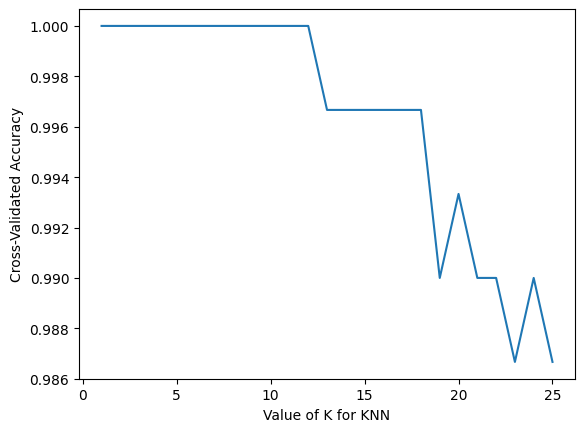

In [52]:
k_range = range(1, 26)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, features_scaled, target, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()